# Exploratory Data Analysis<a id='Exploratory_data_analysis'></a>

In [1]:
#Import necessary packages and load dataset
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import researchpy as rp
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from docx import Document
from docx.shared import Inches

from library.sb_utils import save_file
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

patient_data = pd.read_csv('../data/patient_data_cleaned.csv')

In [2]:
#Verify data loaded correctly
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    bool   
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 73.6+ KB


In [3]:
patient_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,False,Normal,172,N,0.0,Up,False
1,49,F,NAP,160,180.0,False,Normal,156,N,1.0,Flat,True
2,37,M,ATA,130,283.0,False,ST,98,N,0.0,Up,False
3,48,F,ASY,138,214.0,False,Normal,108,Y,1.5,Flat,True
4,54,M,NAP,150,195.0,False,Normal,122,N,0.0,Up,False


In [4]:
#DataFrame with Heart Disease identified
df_HD = patient_data.loc[patient_data['HeartDisease']==1]

#DataFrame with Heart Disease not identified 
df_no_HD = patient_data.loc[patient_data['HeartDisease']==0]

In [5]:
print(f'The number of patients with reported heart disease is {len(df_HD.index)}.\
      \nThe number of patients without reported heart disease is {len(df_no_HD.index)}.\
      \nThe percentage of patients with reported heart disease for the sample set is {round(100 * len(df_HD.index)/len(patient_data),2)}%.')

The number of patients with reported heart disease is 507.      
The number of patients without reported heart disease is 410.      
The percentage of patients with reported heart disease for the sample set is 55.29%.


Based upon the percentage of patients with reported heart disease contained within the provided dataset we can see that there is a roughly equal representation of positive and negative samples. Which should indicate an approximately balanced class for our classification algorithm. 

# Categorical Features<a id='Categorical_Features'></a>

In [6]:
#Define the categorical and numerical columns
categorical_columns = ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease','Sex']
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

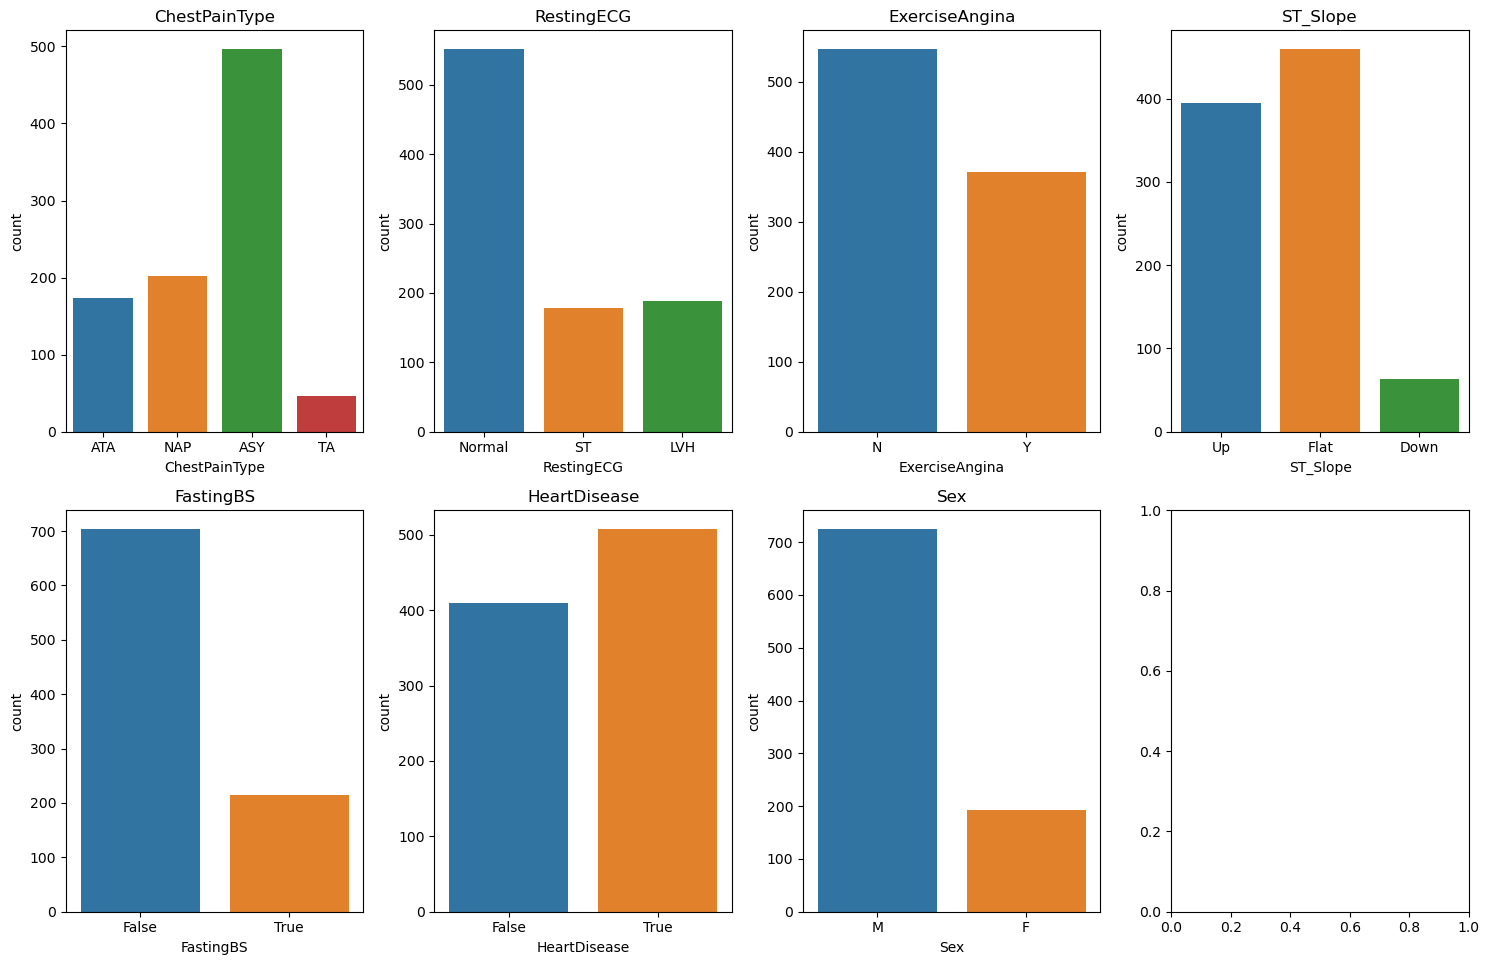

In [49]:
#Ploting categorical features
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 9.75))

for i, column in enumerate(categorical_columns):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=patient_data, x=column)
    title = column
    plt.title(title)
plt.tight_layout()
plt.show()

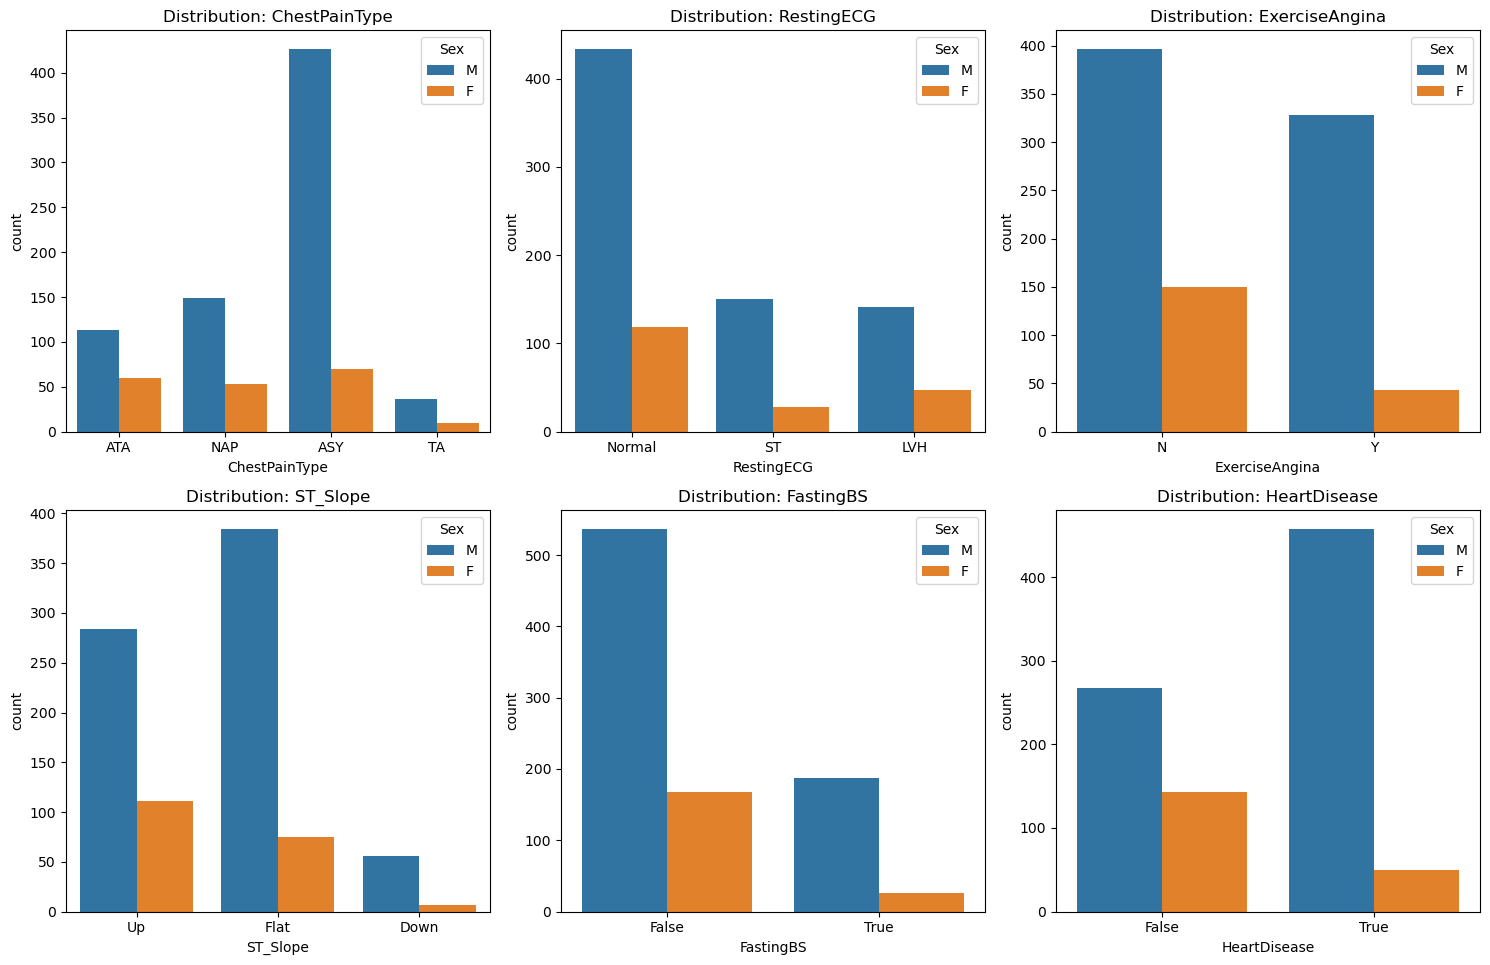

In [53]:
categorical_columns = ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']
#Ploting categorical features
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 9.75))

for i, column in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=patient_data, x=column, hue='Sex')
    title = 'Distribution: ' + column
    plt.title(title)
plt.tight_layout()
plt.show()

In [9]:
rp.summary_cat(patient_data[['Sex']])

,Variable,Outcome,Count,Percent
0,Sex,M,724,78.95
1,,F,193,21.05


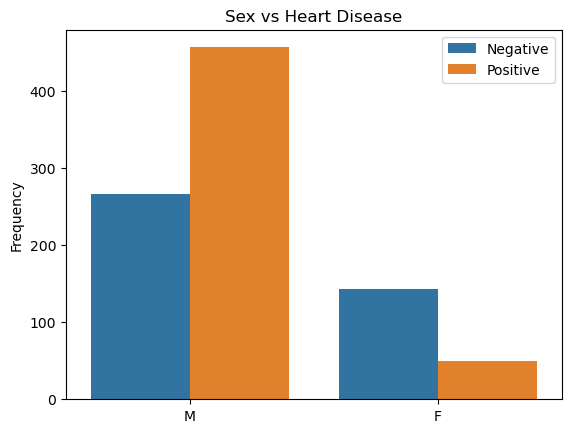

In [10]:
sns.countplot(data=patient_data, x='Sex', hue='HeartDisease')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Sex vs Heart Disease')
plt.legend(['Negative', 'Positive'])
plt.show()

In [11]:
#Chi-square test for independence
crosstab, test_results, expected = rp.crosstab(patient_data['Sex'], patient_data['HeartDisease'], test='chi-square', expected_freqs=True)
print(test_results)
print(expected)

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   85.3700
1                    p-value =    0.0000
2               Cramer's phi =    0.3051
             HeartDisease            
HeartDisease        False       True 
Sex                                  
F               86.292257  106.707743
M              323.707743  400.292257


Sex shows a very strong association with heart disease, based upon the frequency plot males are more likely to test positive for  heart disease in this dataset. More exploration may be required if the association strength of other features with heart disease differ based upon sex.

In [12]:
rp.summary_cat(patient_data[['ChestPainType']])

,Variable,Outcome,Count,Percent
0,ChestPainType,ASY,496,54.09
1,,NAP,202,22.03
2,,ATA,173,18.87
3,,TA,46,5.02


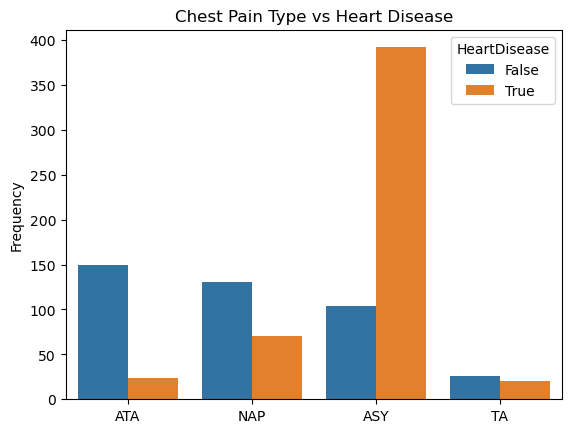

In [13]:
sns.countplot(data=patient_data, x='ChestPainType', hue='HeartDisease')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

In [14]:
#Chi-square test for independence
crosstab, test_results, expected = rp.crosstab(patient_data['ChestPainType'], patient_data['HeartDisease'], test='chi-square', expected_freqs=True)
print(test_results)
print(expected)

                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   268.8963
1                    p-value =     0.0000
2                 Cramer's V =     0.5415
              HeartDisease            
HeartDisease         False       True 
ChestPainType                         
ASY             221.766630  274.233370
ATA              77.350055   95.649945
NAP              90.316249  111.683751
TA               20.567067   25.432933


Chest pain type has a very strong association with heart disease, based on the frequency plot type ASY may be a strong indicator.  

In [15]:
rp.summary_cat(patient_data[['FastingBS']])

,Variable,Outcome,Count,Percent
0,FastingBS,False,703,76.66
1,,True,214,23.34


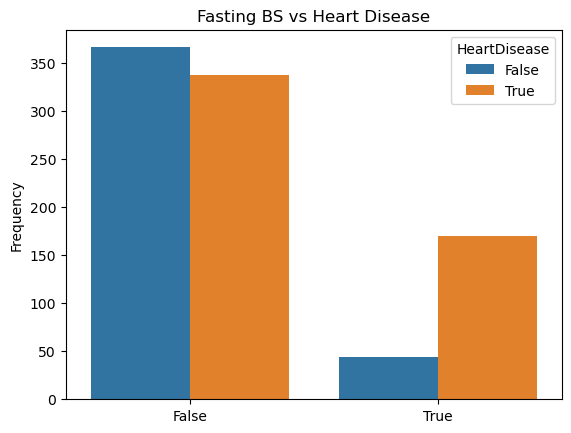

In [16]:
sns.countplot(data=patient_data, x='FastingBS', hue='HeartDisease')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Fasting BS vs Heart Disease')
plt.show()

In [17]:
#Chi-square test for independence
crosstab, test_results, expected = rp.crosstab(patient_data['FastingBS'], patient_data['HeartDisease'], test='chi-square', expected_freqs=True)
print(test_results)
print(expected)

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   65.8595
1                    p-value =    0.0000
2               Cramer's phi =    0.2680
             HeartDisease           
HeartDisease        False      True 
FastingBS                           
False           314.31843  388.68157
True             95.68157  118.31843


Fasting BS shows a very strong association with heart disease.

In [18]:
rp.summary_cat(patient_data[['RestingECG']])

,Variable,Outcome,Count,Percent
0,RestingECG,Normal,551,60.09
1,,LVH,188,20.50
2,,ST,178,19.41


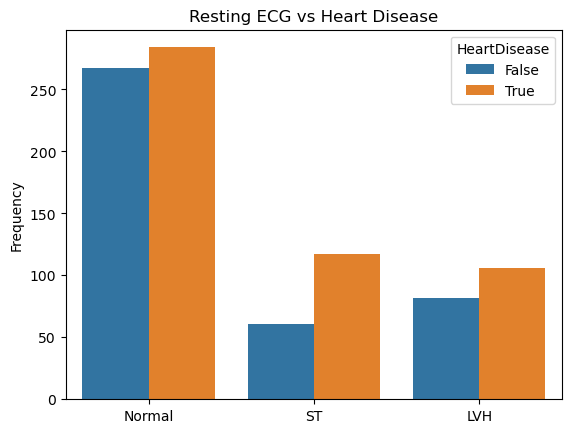

In [19]:
sns.countplot(data=patient_data, x='RestingECG', hue='HeartDisease')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Resting ECG vs Heart Disease')
plt.show()

In [20]:
#Chi-square test for independence
crosstab, test_results, expected = rp.crosstab(patient_data['RestingECG'], patient_data['HeartDisease'], test='chi-square', expected_freqs=True)
print(test_results)
print(expected)

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   11.0695
1                    p-value =    0.0039
2                 Cramer's V =    0.1099
             HeartDisease            
HeartDisease        False       True 
RestingECG                           
LVH             84.056707  103.943293
Normal         246.357688  304.642312
ST              79.585605   98.414395


Resting ECG shows a moderate association with heart disease.

In [21]:
rp.summary_cat(patient_data[['ExerciseAngina']])

,Variable,Outcome,Count,Percent
0,ExerciseAngina,N,546,59.54
1,,Y,371,40.46


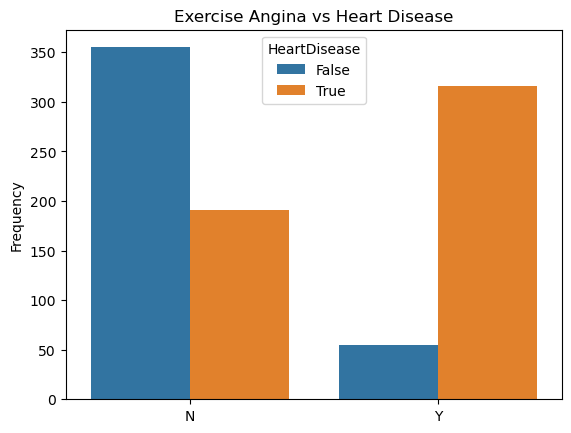

In [22]:
sns.countplot(data=patient_data, x='ExerciseAngina', hue='HeartDisease')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Exercise Angina vs Heart Disease')
plt.show()

In [23]:
#Chi-square test for independence
crosstab, test_results, expected = rp.crosstab(patient_data['ExerciseAngina'], patient_data['HeartDisease'], test='chi-square', expected_freqs=True)
print(test_results)
print(expected)

                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   225.1331
1                    p-value =     0.0000
2               Cramer's phi =     0.4955
               HeartDisease            
HeartDisease          False       True 
ExerciseAngina                         
N                244.122137  301.877863
Y                165.877863  205.122137


Exercise Angina or the presence of pain with an increase in heart rate shows a very strong association with heart disease.

In [24]:
rp.summary_cat(patient_data[['ST_Slope']])

,Variable,Outcome,Count,Percent
0,ST_Slope,Flat,459,50.05
1,,Up,395,43.08
2,,Down,63,6.87


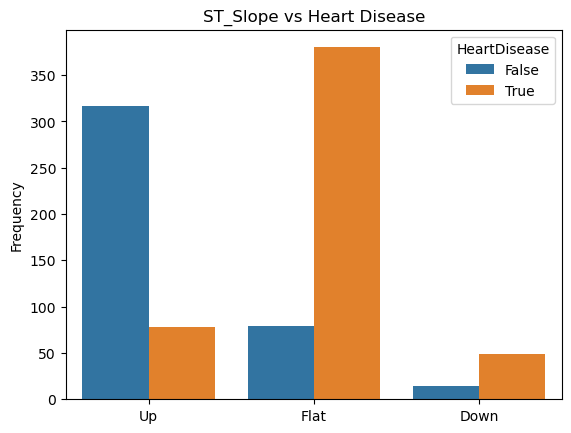

In [25]:
#Plotting ST_Slope, ExerciseAngina, ChestPainType, Sex against Heart Disease
sns.countplot(data=patient_data, x='ST_Slope', hue='HeartDisease')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('ST_Slope vs Heart Disease')
plt.show()

In [26]:
#Chi-square test for independence
crosstab, test_results, expected = rp.crosstab(patient_data['ST_Slope'], patient_data['HeartDisease'], test='chi-square', expected_freqs=True)
print(test_results)
print(expected)

                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   355.1557
1                    p-value =     0.0000
2                 Cramer's V =     0.6223
             HeartDisease            
HeartDisease        False       True 
ST_Slope                             
Down            28.167939   34.832061
Flat           205.223555  253.776445
Up             176.608506  218.391494


S/T slope which is the segment shift relative to exercise-induced increments of heart rate shows a very strong relationship with heart disease, judging by the frequency plot this correlation may be based on a flat or down trend with an upward trend showing the least likely to correspond with a positive result. 

# Numerical Features<a id='Numerical_Features'></a>

In [27]:
ttest_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'] 

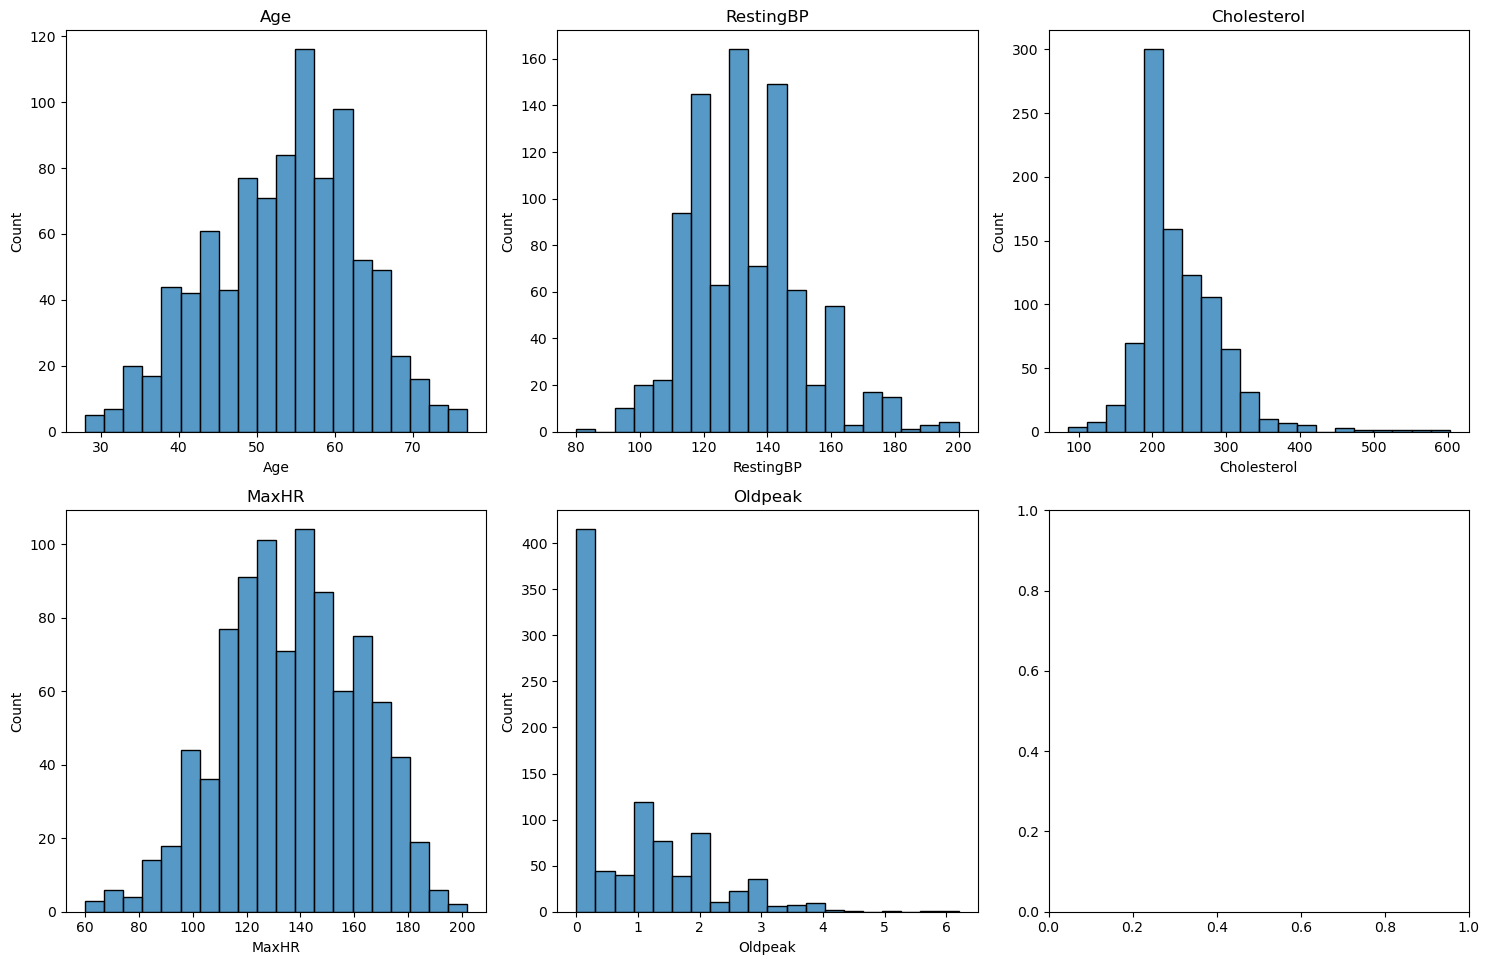

In [44]:
#Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9.75))

#Plotting distribution plots for numerical columns
for i, column in enumerate(numerical_columns[:5]):
    sns.histplot(data=patient_data, x=column, bins=20,  common_norm=False, ax=axes[i // 3, i % 3])
    title = column
    axes[i // 3, i % 3].set_title(title)

#Adjust subplot spacing
plt.tight_layout()
plt.show()

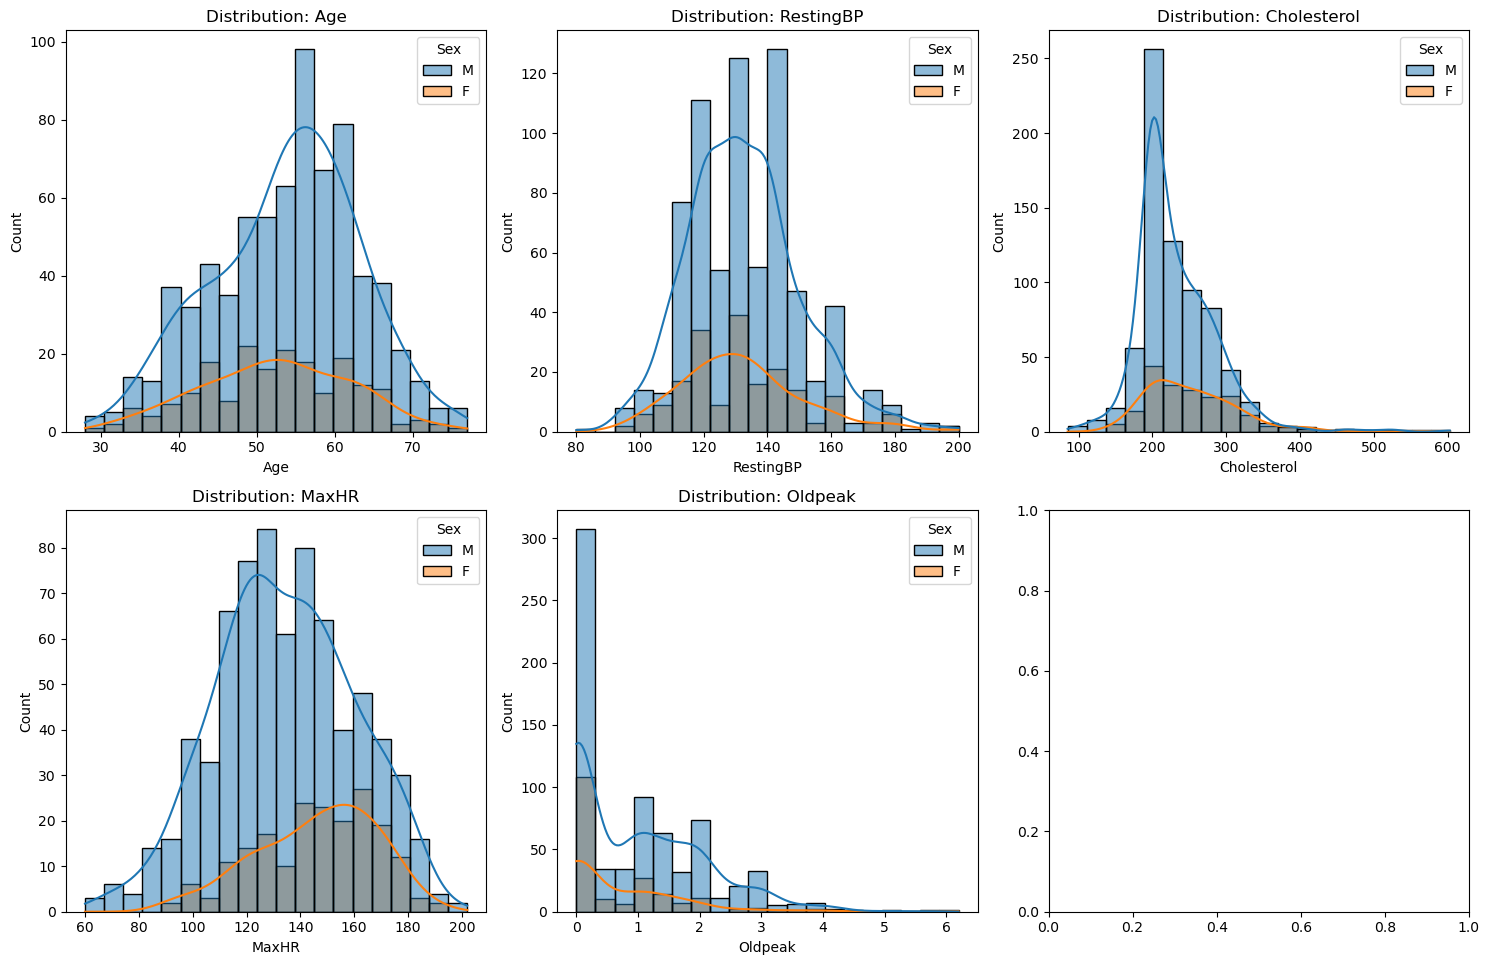

In [45]:
#Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9.75))

#Plotting distribution plots for numerical columns
for i, column in enumerate(numerical_columns[:5]):
    sns.histplot(data=patient_data, x=column, hue='Sex', bins=20, kde=True, common_norm=False, ax=axes[i // 3, i % 3])
    title = 'Distribution: ' + column
    axes[i // 3, i % 3].set_title(title)

#Adjust subplot spacing
plt.tight_layout()
plt.show()

In [30]:
for col in ttest_col:
    t, p = st.ttest_ind(df_HD[col], df_no_HD[col])
    print(f'{col}: t={round(t,2)}, p-value={p}')

Age: t=8.89, p-value=3.1608374545678206e-18
RestingBP: t=3.59, p-value=0.0003427865820658374
Cholesterol: t=-0.34, p-value=0.7342297705776781
MaxHR: t=-13.26, p-value=8.044072537846356e-37
Oldpeak: t=14.24, p-value=1.0953740022189476e-41


In [31]:
ttest_results = []

for col in ttest_col:
    t, p = st.ttest_ind(df_HD[col], df_no_HD[col])
    ttest_results.append({'Variable': col, 't': round(t, 2), 'p-value': p})

# Create a DataFrame from the list of results
result_df = pd.DataFrame(ttest_results)

# Export the DataFrame to a Word document
doc = Document()
doc.add_heading('T-Test Results', 0)

# Create a table with column names and data
table = doc.add_table(result_df.shape[0] + 1, result_df.shape[1])
table.style = 'Table Grid'

# Add the column names to the first row
for i, col_name in enumerate(result_df.columns):
    table.cell(0, i).text = col_name

# Add the data to the table
for row_idx in range(result_df.shape[0]):
    for col_idx in range(result_df.shape[1]):
        table.cell(row_idx + 1, col_idx).text = str(result_df.iloc[row_idx, col_idx])

# Save the Word document
doc.save('../data/ttest_results.docx')


All numerical categories show a significant relationship to heart disease except for Cholesterol.

In [32]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

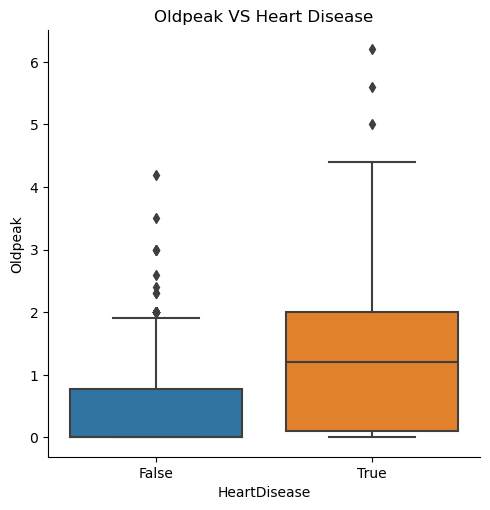

In [33]:
sns.catplot(data=patient_data, x='HeartDisease', y='Oldpeak', kind='box')
plt.title('Oldpeak VS Heart Disease')
plt.show()

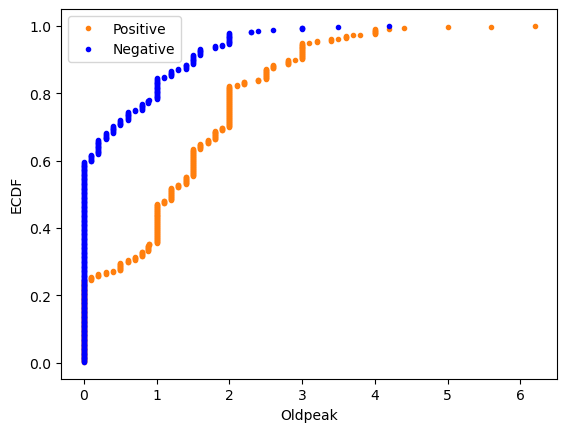

In [34]:
x_Oldpeak, y_Oldpeak = ecdf(df_HD['Oldpeak'])
x_Oldpeak_no_HD, y_Oldpeak_no_HD = ecdf(df_no_HD['Oldpeak'])
line1 = plt.plot(x_Oldpeak,y_Oldpeak, color='tab:orange', marker='.', linestyle='none')
line2 = plt.plot(x_Oldpeak_no_HD,y_Oldpeak_no_HD, color='b', marker='.', linestyle='none')
plt.legend(['1', '0'])
plt.xlabel('Oldpeak')
plt.ylabel('ECDF')
plt.legend(['Positive', 'Negative'])
plt.show()

Oldpeak has a significant relationship with heart disease, based on the box plot type and ecdf those with heart disease are more likely to have a nonzero Oldpeak. 

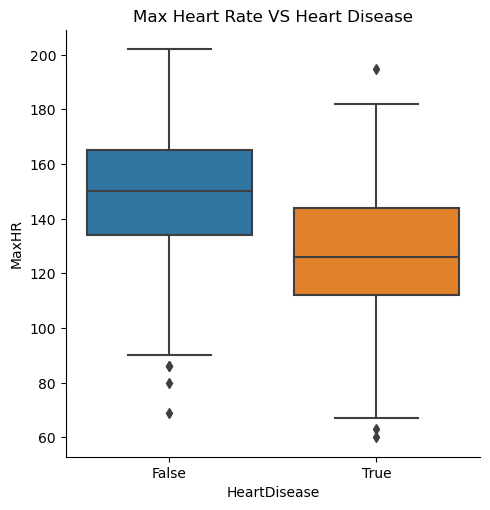

In [35]:
sns.catplot(data=patient_data, x='HeartDisease', y='MaxHR', kind='box')
plt.title('Max Heart Rate VS Heart Disease')
plt.show()

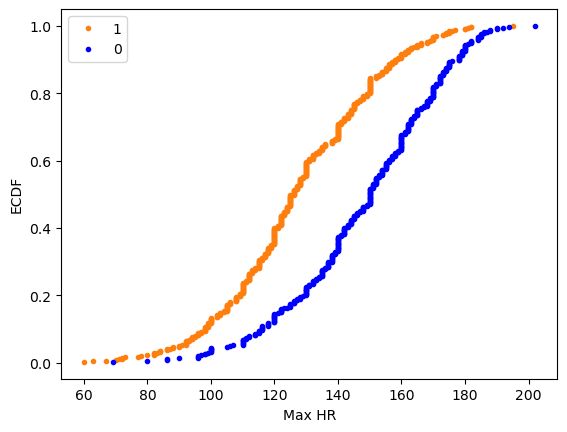

In [36]:
MaxHR_HD = patient_data.loc[patient_data['HeartDisease'] == 1]
MaxHR_NHD = patient_data.loc[patient_data['HeartDisease'] == 0]
x_MaxHR, y_MaxHR = ecdf(MaxHR_HD['MaxHR'])
x_MaxHR_NHD, y_MaxHR_NHD = ecdf(MaxHR_NHD['MaxHR'])
line1 = plt.plot(x_MaxHR,y_MaxHR, color='tab:orange', marker='.', linestyle='none')
line2 = plt.plot(x_MaxHR_NHD,y_MaxHR_NHD, color='b', marker='.', linestyle='none')
plt.legend(['1', '0'])
plt.xlabel('Max HR')
plt.ylabel('ECDF')
plt.show()

Max heart rate has a significant relationship with heart disease, based on the box plot and ecdf those with heart disease are more likely to have a lower max heart rate. 

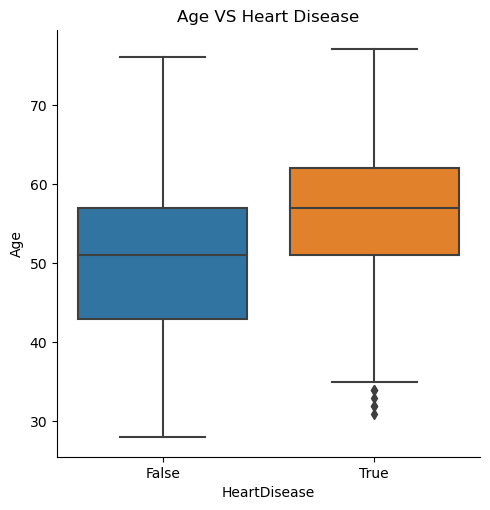

In [37]:
sns.catplot(data=patient_data, x='HeartDisease', y='Age', kind='box')
plt.title('Age VS Heart Disease')
plt.show()

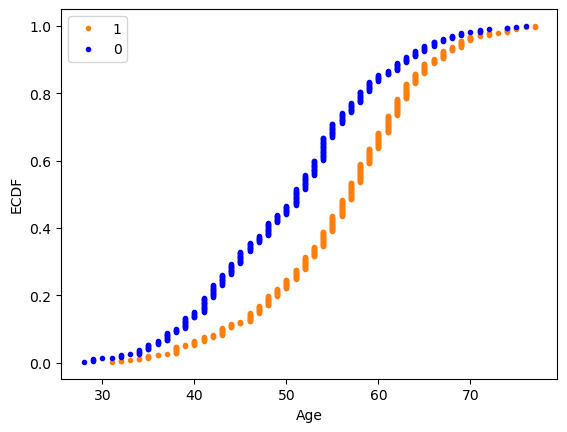

In [38]:
x_Age, y_Age = ecdf(df_HD['Age'])
x_Age_no_HD, y_Age_no_HD = ecdf(df_no_HD['Age'])
line1 = plt.plot(x_Age,y_Age, color='tab:orange', marker='.', linestyle='none')
line2 = plt.plot(x_Age_no_HD,y_Age_no_HD, color='b', marker='.', linestyle='none')
plt.legend(['1', '0'])
plt.xlabel('Age')
plt.ylabel('ECDF')
plt.show()

Age has a significant relationship with heart disease, based on the box plot and ecdf those with heart disease are more likely to be older. 

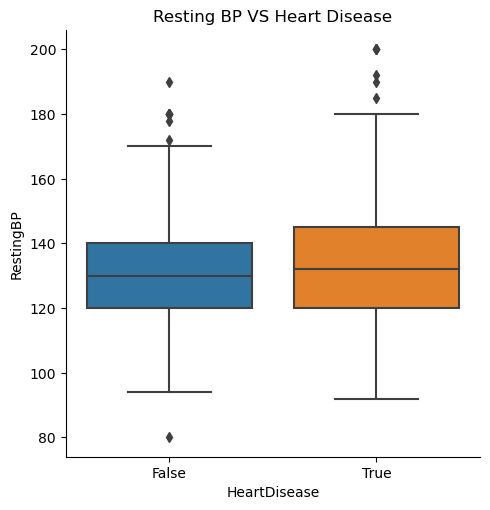

In [39]:
sns.catplot(data=patient_data, x='HeartDisease', y='RestingBP', kind='box')
plt.title('Resting BP VS Heart Disease')
plt.show()

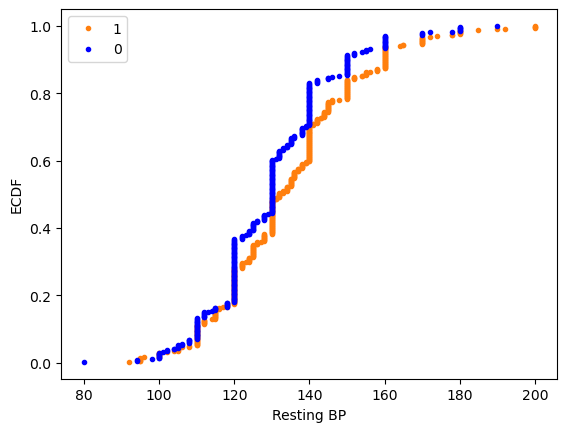

In [40]:
x_RestingBP, y_RestingBP = ecdf(df_HD['RestingBP'])
x_RestingBP_no_HD, y_RestingBP_no_HD = ecdf(df_no_HD['RestingBP'])
line1 = plt.plot(x_RestingBP,y_RestingBP, color='tab:orange', marker='.', linestyle='none')
line2 = plt.plot(x_RestingBP_no_HD,y_RestingBP_no_HD, color='b', marker='.', linestyle='none')
plt.legend(['1', '0'])
plt.xlabel('Resting BP')
plt.ylabel('ECDF')
plt.show()

Resting BP has a significant relationship with heart disease, based on the box plot and ecdf those with heart disease are more likely to have a slightly higher Resting BP. 

# Summary<a id='Summary'></a>

The findings from the exploratory data analysis revealed that most of the features presented in the dataset have a weak to strong relationship or association with the presence of heart disease. Ranking the categorical features from strongest association based upon their Cramer’s V score: ST Slope, Chest Pain Type, Exercise Angina, Sex, Fasting BS, Resting ECG. With Resting ECG being the only categorical feature to not show a very strong association but rather a moderate association. 

Furthermore, ranking numerical features from strongest relationship based upon t-test: Oldpeak, Max HR, Age, Resting BP. With Cholesterol being the only feature to not show a significant result when compared to heart disease. Suggesting there is no relationship between Cholesterol and heart disease however, it is worth noting that in the raw data Cholesterol had the highest number of missing values. 
